In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def format_list(input_str):
    """
    Just changing the format of a column
    to make it workable
    """
    cleaned_str = input_str.strip("[]").replace("'", "")

    items = cleaned_str.split(',')
    items = [item.strip() for item in items]

    formatted_str = ';'.join(items)

    return formatted_str



In [ ]:
dataset = pd.read_csv('alldesc_dataset.csv')

dataset['Descriptors'] = dataset['Descriptors'].apply(format_list)
dataset = dataset[['CID', 'IsomericSMILES', 'Descriptors']]

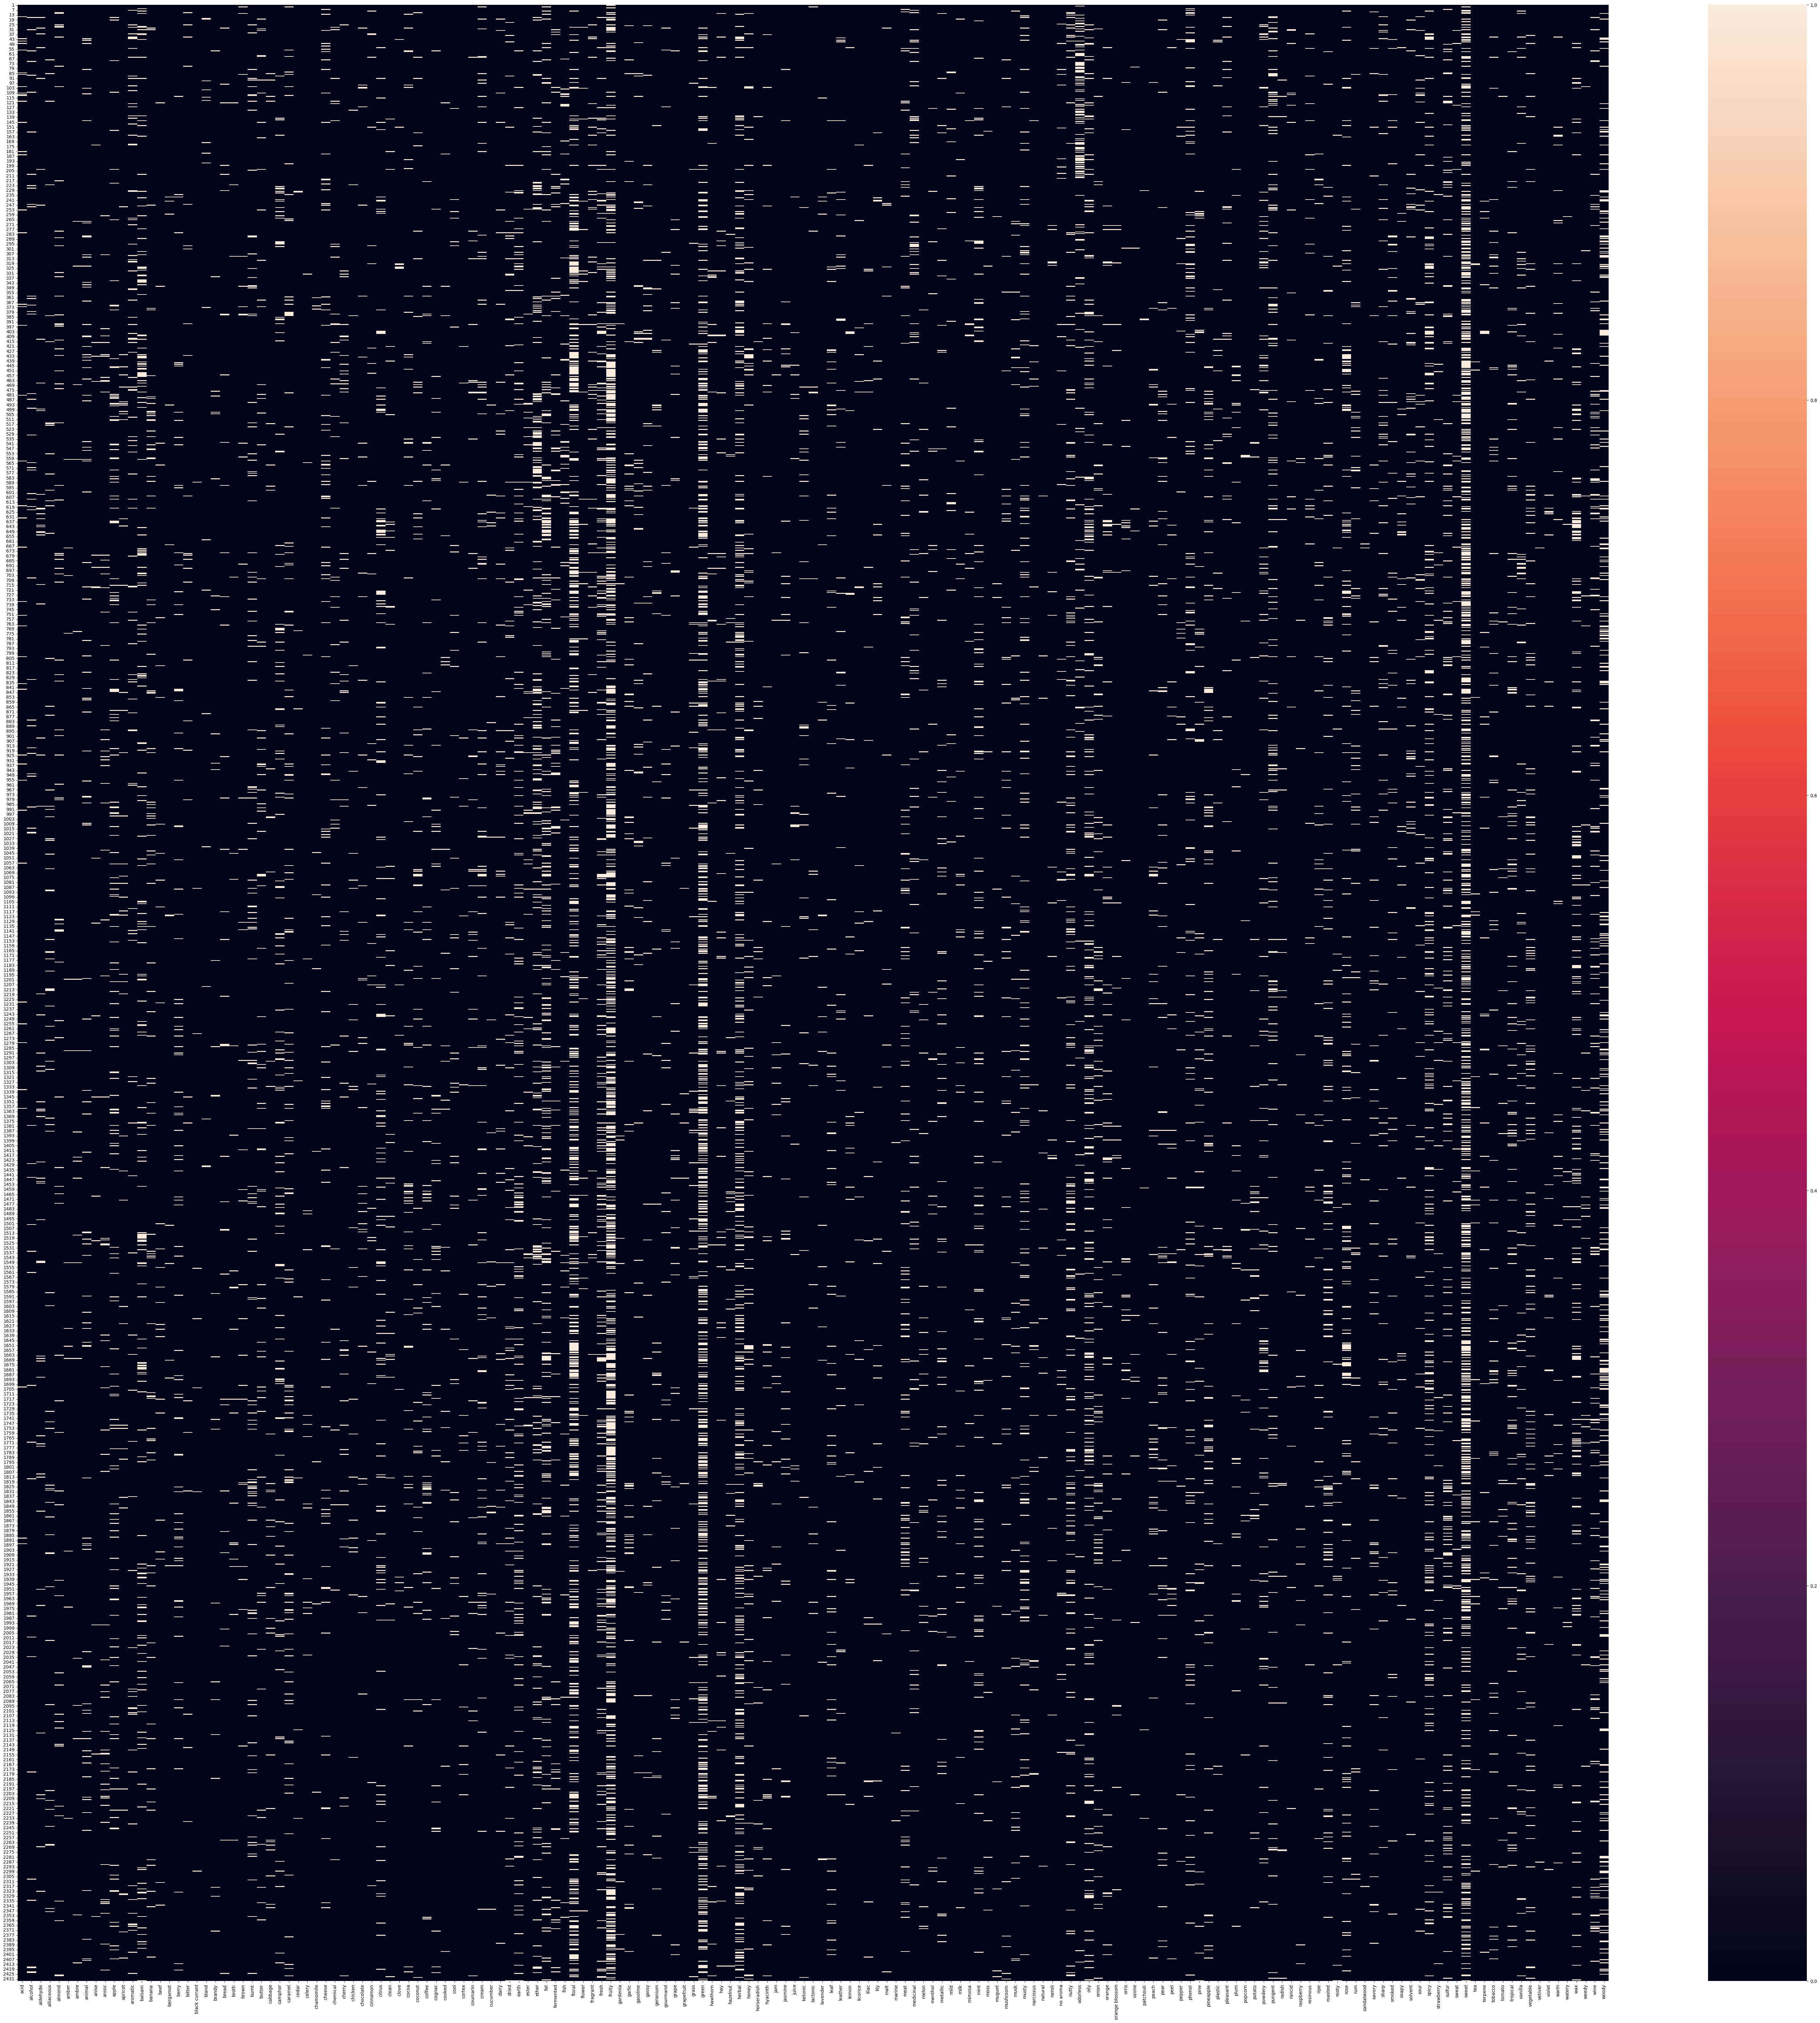

In [ ]:
cluster_dataset = dataset.copy()

label_data = cluster_dataset.drop(["CID", "IsomericSMILES"], axis=1)

# Split the labels by semicolon and store them as a list
lst = label_data['Descriptors'].str.split(';').tolist()
u = (pd.get_dummies(pd.DataFrame(lst), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())

u = u.iloc[1: , :]
u = u.iloc[: , 1:]

# graph size
plt.figure(1, figsize = (80 ,80))
# creating heatmap
sns.heatmap(u)
# showing graph
plt.show()

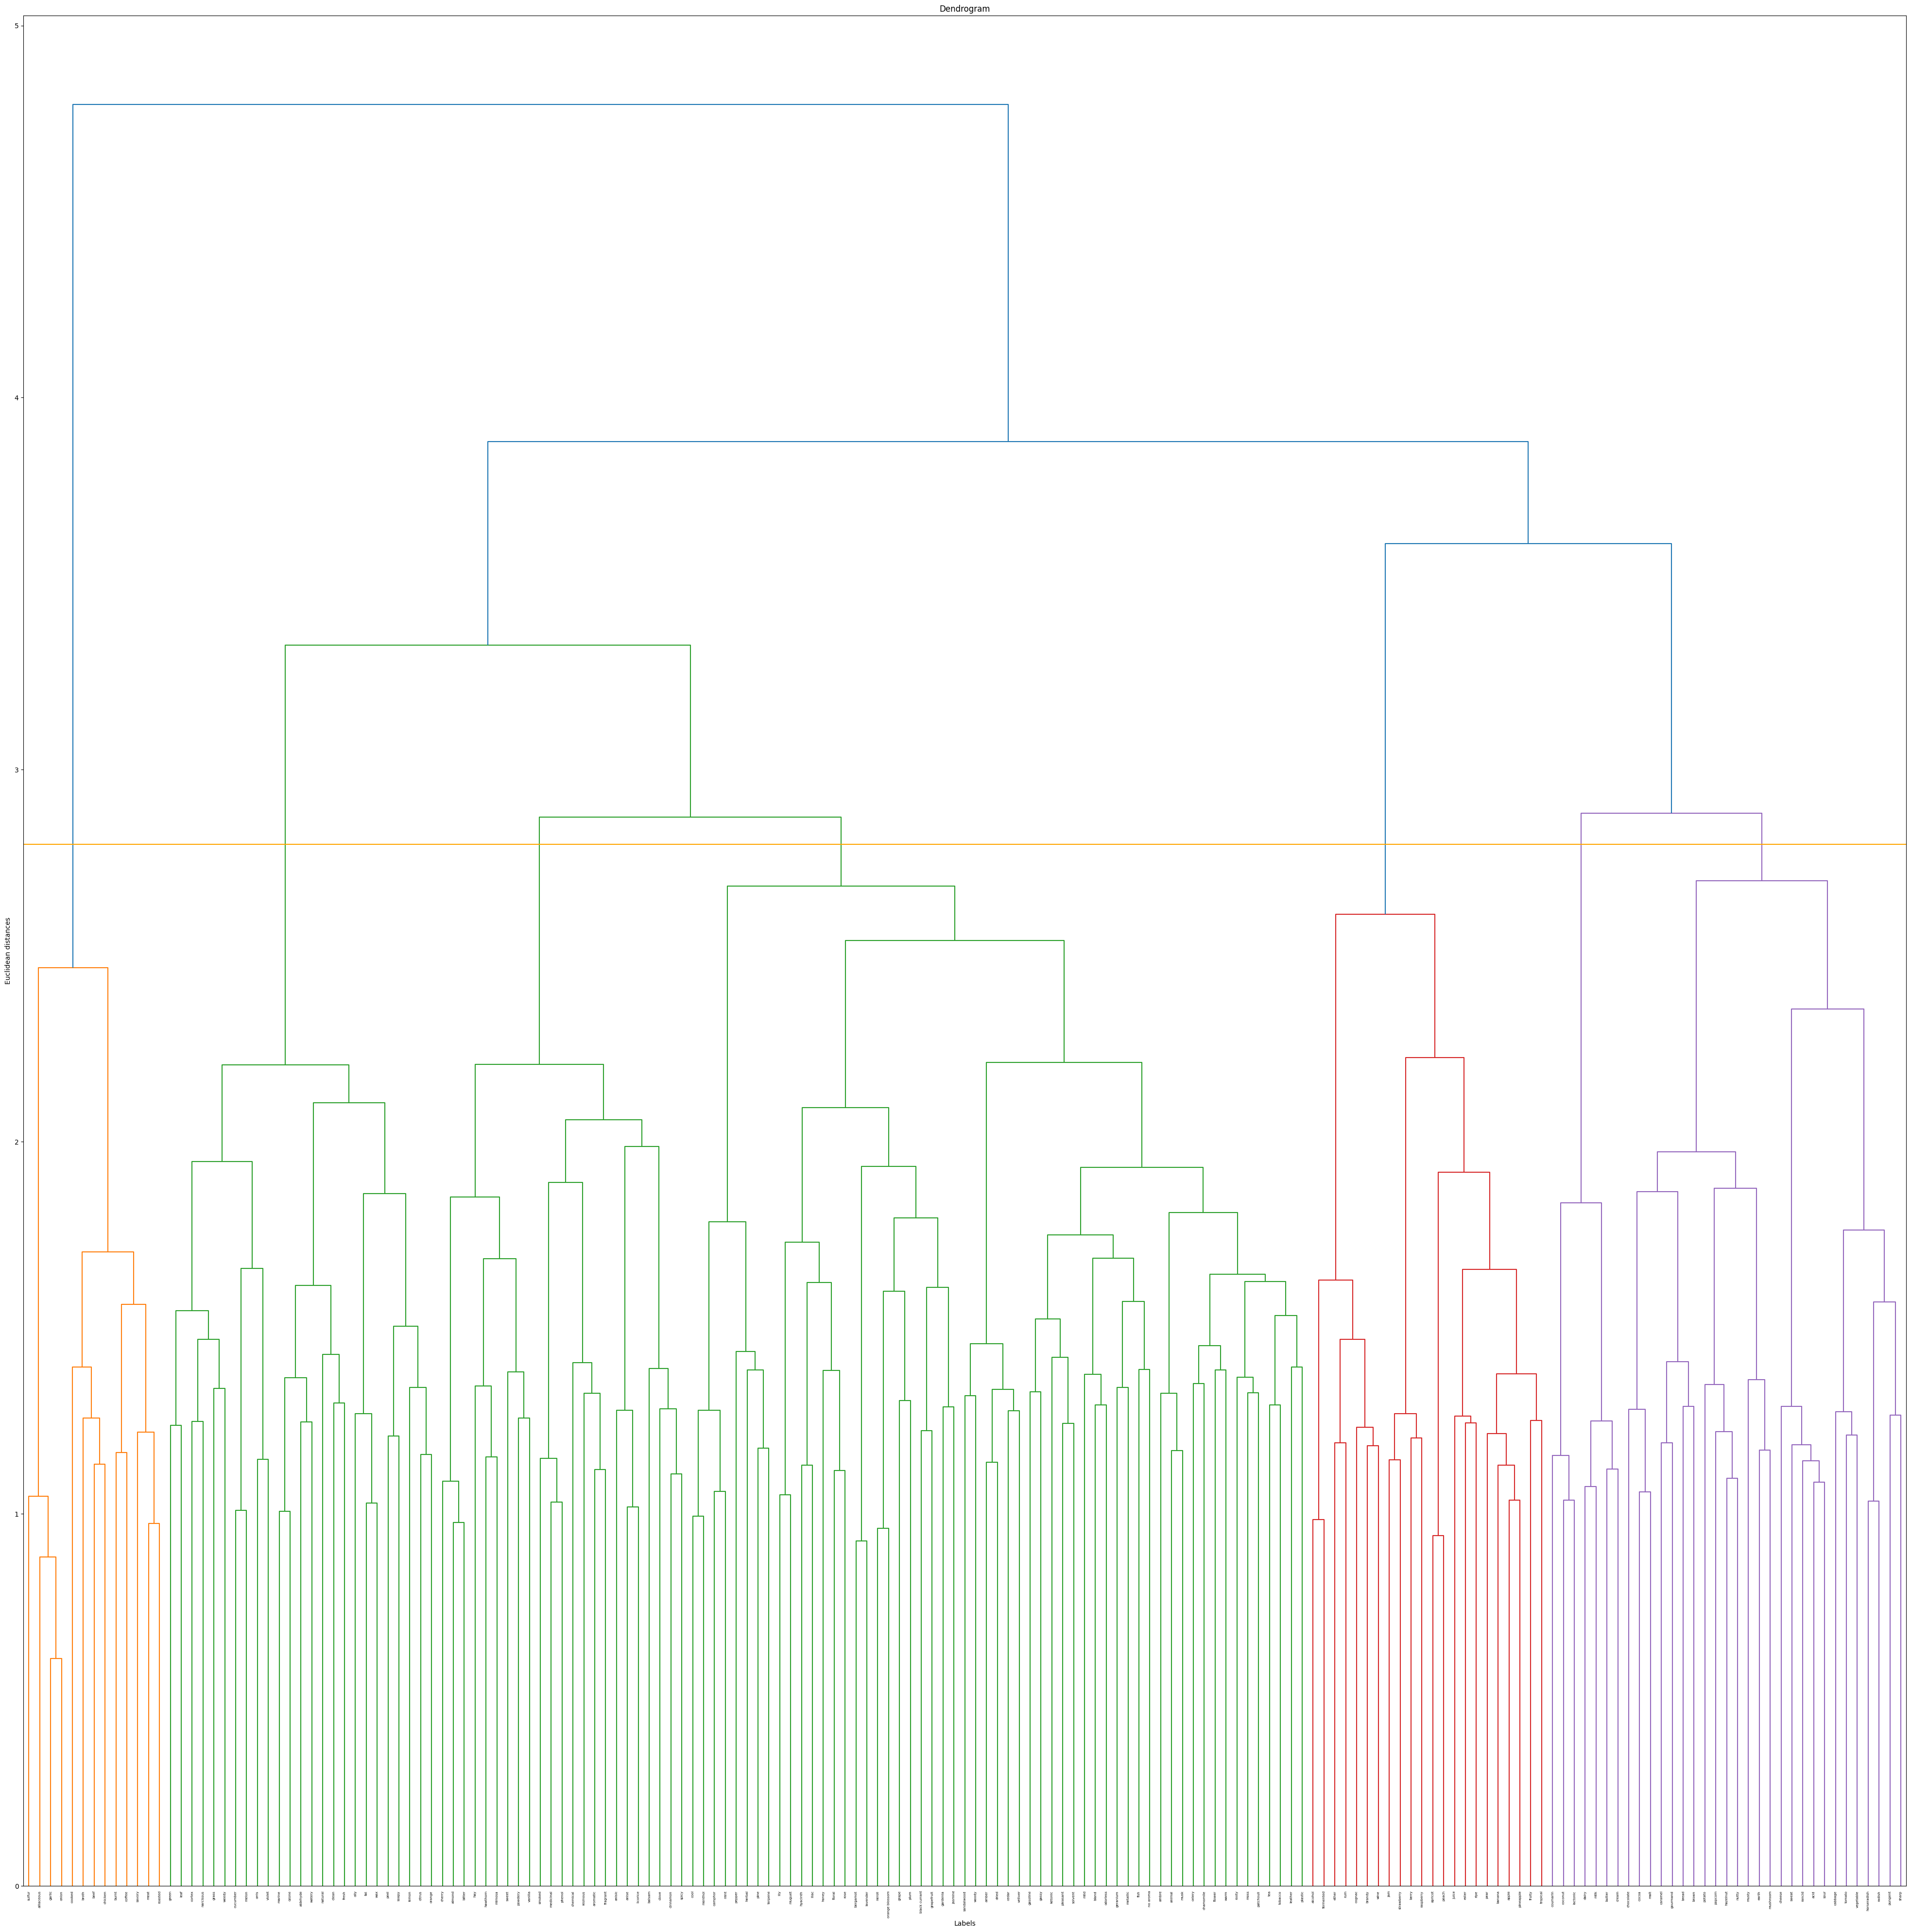

In [ ]:
correlation_matrix = u.corr()

# importing the required module
import scipy.cluster.hierarchy as sch
# graph size
plt.figure(1, figsize = (50 ,50))
# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(correlation_matrix, method  = "ward"), labels = correlation_matrix.columns)
# ploting graphabs
plt.axhline(y=2.8, color='orange')
plt.title('Dendrogram')
plt.xlabel('Labels')
plt.ylabel('Euclidean distances')
plt.show()

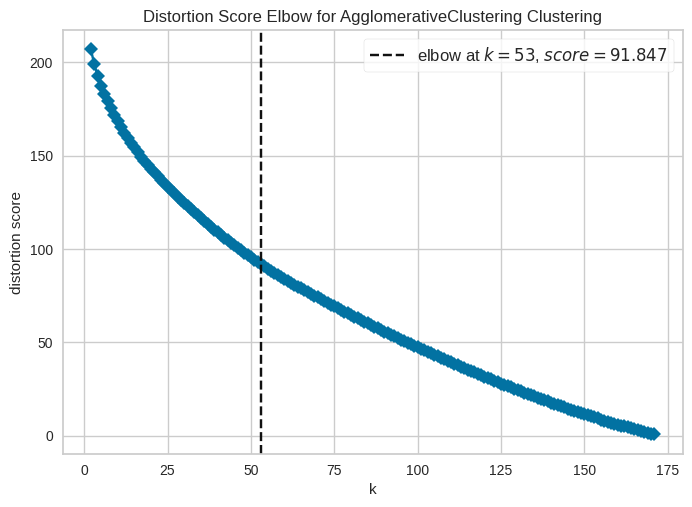

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
correlation_matrix = u.corr()
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,172), timings=False)
# Fit data to visualizer
visualizer.fit(correlation_matrix)
# Finalize and render figure
visualizer.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

correlation_matrix = u.corr()


# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 11, affinity = 'euclidean', linkage ='ward')
# training the model on dataset
y_model = model.fit_predict(correlation_matrix)
# creating pandas dataframe
correlation_matrix['cluster'] = pd.Series(y_model)

umbrella = {}
for i in range(len(y_model)):
    if y_model[i] not in umbrella:
        umbrella[y_model[i]] = []
    umbrella[y_model[i]].append(correlation_matrix.columns[i])

def change_key(dicty, old_key, new_key):
  dicty[new_key] = dicty[old_key]
  del dicty[old_key]
  return dicty

umbrella = change_key(umbrella, 0, 'sulfur')
umbrella = change_key(umbrella, 1, 'fruity')
umbrella = change_key(umbrella, 2, 'acid')
umbrella = change_key(umbrella, 3, 'earthy_woody')
umbrella = change_key(umbrella, 4, 'fresh_citrus')
umbrella = change_key(umbrella, 5, 'dairy')
umbrella = change_key(umbrella, 6, 'aromatic_spicy')
umbrella = change_key(umbrella, 7, 'gourmand_nutty')
umbrella = change_key(umbrella, 8, 'cool/minty')
umbrella = change_key(umbrella, 9, 'alcohol')
umbrella = change_key(umbrella, 10, 'floral_fruity')

check = rows = [(word, key) for key, words in umbrella.items() for word in words]
mapping = pd.DataFrame(rows, columns=["Original Descriptors", "Umbrella Terms"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
umbrella

{'sulfur': ['acid',
  'butter',
  'cheese',
  'coconut',
  'cream',
  'dairy',
  'lactonic',
  'milk',
  'rancid',
  'sour',
  'sweat'],
 'fruity': ['almond',
  'anise',
  'anisic',
  'balsam',
  'bitter',
  'cherry',
  'cinnamon',
  'clove',
  'coumarin',
  'hawthorn',
  'hay',
  'licorice',
  'medicinal',
  'mimosa',
  'phenol',
  'powdery',
  'smoked',
  'spicy',
  'sweet',
  'vanilla',
  'warm'],
 'acid': ['amber',
  'ambre',
  'animal',
  'aromatic',
  'black currant',
  'bland',
  'cedar',
  'celery',
  'chamomile',
  'chemical',
  'clean',
  'cortex',
  'cucumber',
  'dried',
  'earth',
  'fish',
  'fragrant',
  'gasoline',
  'gassy',
  'geranium',
  'grapefruit',
  'grass',
  'green',
  'ketonic',
  'leaf',
  'leather',
  'marine',
  'melon',
  'metallic',
  'mild',
  'moss',
  'mushroom',
  'musk',
  'narcissus',
  'natural',
  'no aroma',
  'odorless',
  'orris',
  'ozone',
  'patchouli',
  'plastic',
  'pleasant',
  'pungent',
  'resinous',
  'rooty',
  'sandalwood',
  'shar

In [ ]:
for keys,values in umbrella.items():
    print(keys)
    print(values)

sulfur
['alliaceous', 'beef', 'broth', 'burnt', 'chicken', 'coffee', 'cooked', 'garlic', 'meat', 'onion', 'roasted', 'savory', 'sulfur']
fruity
['apple', 'apricot', 'banana', 'berry', 'ester', 'fruity', 'jam', 'juice', 'peach', 'pear', 'pineapple', 'raspberry', 'ripe', 'strawberry', 'tropical']
acid
['acid', 'cabbage', 'cheese', 'horseradish', 'pungent', 'radish', 'rancid', 'sharp', 'sour', 'sweat', 'tomato', 'vegetable']
earthy_woody
['amber', 'ambre', 'animal', 'bland', 'cedar', 'celery', 'chamomile', 'dried', 'fish', 'flower', 'gasoline', 'gassy', 'geranium', 'ketonic', 'leather', 'metallic', 'mild', 'moss', 'musk', 'no aroma', 'odorless', 'patchouli', 'plastic', 'pleasant', 'rooty', 'sandalwood', 'solvent', 'tea', 'tobacco', 'vetiver', 'warm', 'woody']
fresh_citrus
['aldehyde', 'citrus', 'clean', 'cortex', 'cucumber', 'fat', 'fresh', 'grass', 'green', 'leaf', 'lemon', 'marine', 'melon', 'narcissus', 'natural', 'oily', 'orange', 'orris', 'ozone', 'peel', 'soapy', 'violet', 'watery',

In [ ]:
mapping.to_excel("computer_derived_ontology_11.xlsx")

In [ ]:
correlation_matrix = u.corr()

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 53, affinity = 'euclidean', linkage ='ward')
# training the model on dataset
y_model = model.fit_predict(correlation_matrix)
# creating pandas dataframe
correlation_matrix['cluster'] = pd.Series(y_model)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
umbrella = {}
for i in range(len(y_model)):
    if y_model[i] not in umbrella:
        umbrella[y_model[i]] = []
    umbrella[y_model[i]].append(correlation_matrix.columns[i])

In [ ]:
umbrella

{12: ['acid', 'cheese', 'rancid', 'sour', 'sweat'],
 44: ['alcohol', 'fermented'],
 23: ['aldehyde', 'marine', 'ozone', 'watery'],
 50: ['alliaceous', 'garlic', 'onion', 'sulfur'],
 30: ['almond', 'bitter', 'cherry'],
 6: ['amber', 'cedar', 'dried', 'sandalwood', 'vetiver', 'woody'],
 15: ['ambre', 'animal', 'musk'],
 20: ['anise', 'anisic', 'licorice'],
 11: ['apple', 'banana', 'fruity', 'pear', 'pineapple', 'tropical'],
 51: ['apricot', 'peach'],
 21: ['aromatic', 'chemical', 'fragrant', 'resinous'],
 16: ['balsam', 'cinnamon', 'clove', 'spicy'],
 38: ['beef', 'broth', 'chicken', 'cooked'],
 47: ['bergamot', 'lavender'],
 27: ['berry', 'jam', 'raspberry', 'strawberry'],
 48: ['black currant', 'grapefruit'],
 9: ['bland', 'mild', 'odorless'],
 3: ['brandy', 'cognac', 'ether', 'rum', 'wine'],
 18: ['bread', 'brown', 'caramel', 'gourmand'],
 25: ['burnt', 'coffee'],
 32: ['butter', 'cream', 'dairy', 'milk'],
 35: ['cabbage', 'tomato', 'vegetable'],
 34: ['camphor', 'cool', 'menthol', 'm

In [ ]:
import scipy.cluster.hierarchy as sch
# size of image
plt.figure(1, figsize = (16 ,8))
plt.grid(b=None)
# creating the dendrogram
dend = sch.dendrogram(sch.linkage(correlation_matrix, method='ward'))
# theroshold
plt.axhline(y=175, color='orange')
# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


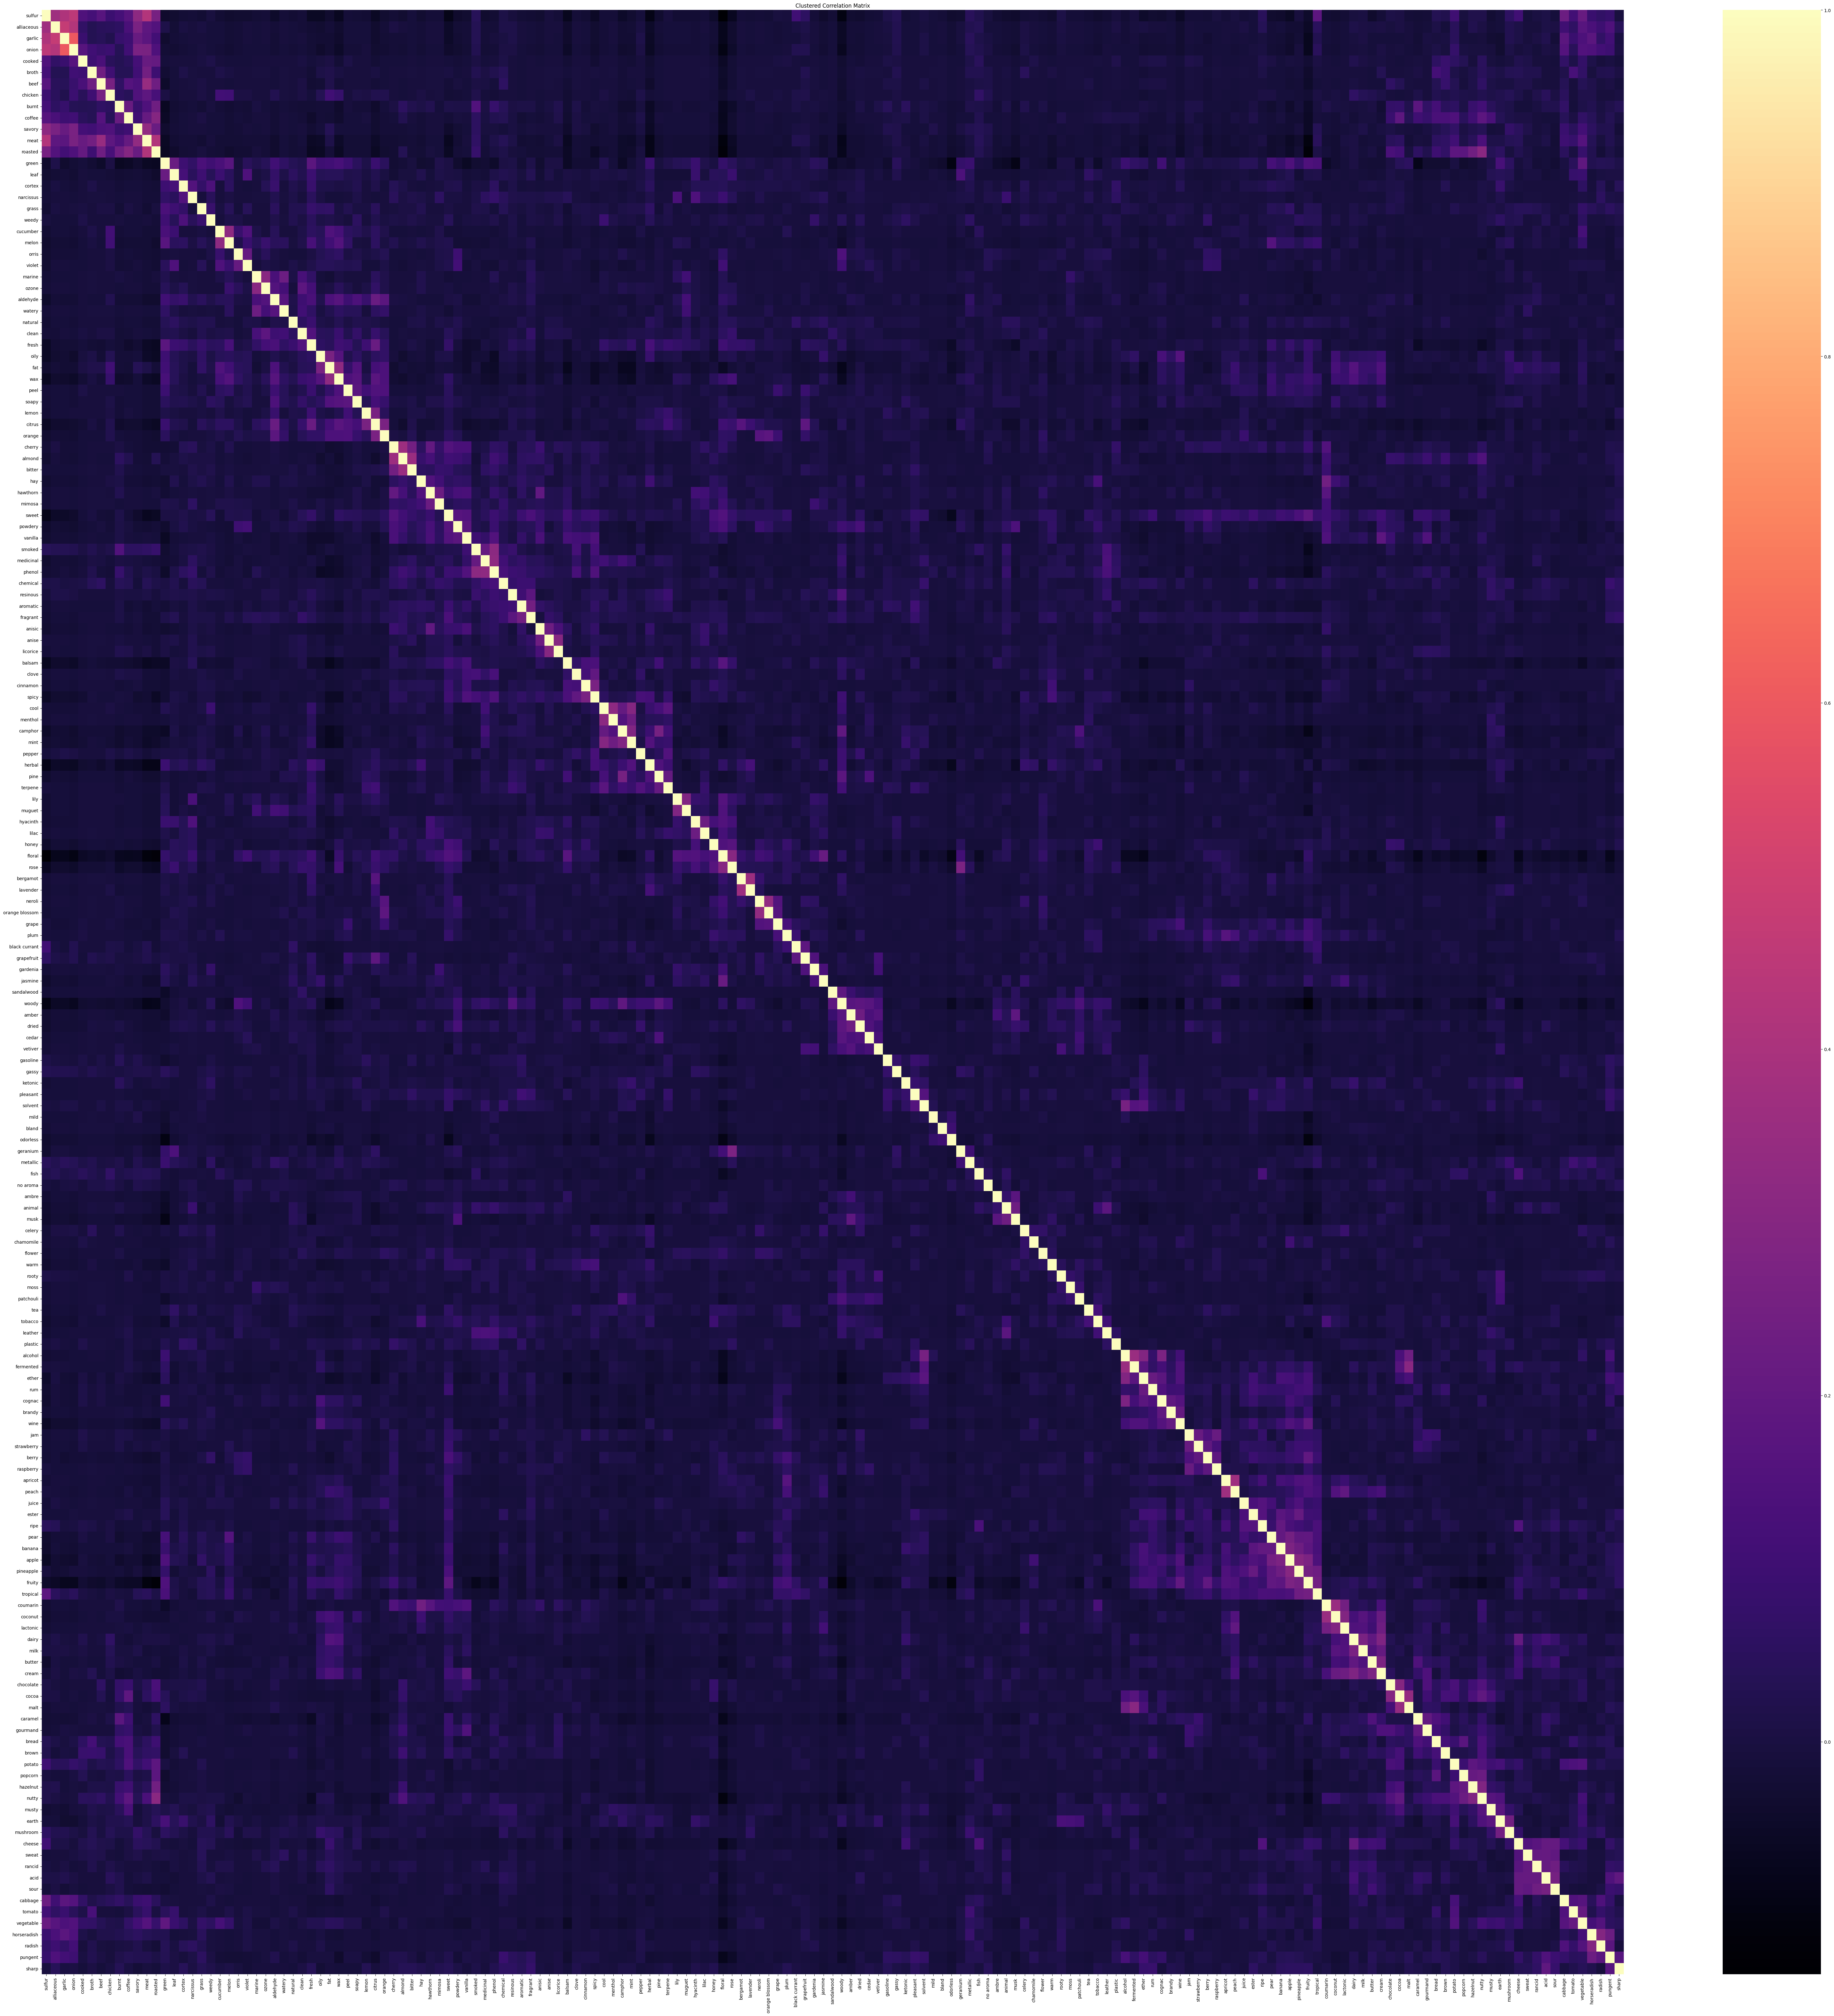

In [ ]:
cluster_dataset = dataset.copy()

label_data = cluster_dataset.drop(["CID", "IsomericSMILES"], axis=1)

# Split the labels by semicolon and store them as a list
lst = label_data['Descriptors'].str.split(';').tolist()
u = (pd.get_dummies(pd.DataFrame(lst), prefix='', prefix_sep='')
       .groupby(level=0, axis=1)
       .sum())

correlation_matrix = u.corr()
correlation_matrix = correlation_matrix.iloc[1: , :]
correlation_matrix = correlation_matrix.iloc[: , 1:]

# Calculate the hierarchical clustering and obtain the linkage matrix
linkage = sns.clustermap(correlation_matrix, method='ward', cmap="magma", figsize=(80, 80), annot=False)

# Extract the new order of columns based on the clustering
new_order = linkage.dendrogram_row.reordered_ind

# Reorder the correlation matrix and create a reordered heatmap
reordered_correlation_matrix = correlation_matrix.iloc[new_order, new_order]
plt.figure(figsize=(80, 80))
sns.heatmap(reordered_correlation_matrix, cmap="magma", annot=False)
plt.title("Clustered Correlation Matrix")
plt.show()